# CHAPITRE 0 : RAPPELS D'ALGÈBRE LINÉAIRE

Ce chapitre introduit et rappelle les outils mathématiques qui vont être utiles pour résoudre certains problèmes de la physique quantique (**PHY321 - Introduction à la Mécanique Quantique**). Il est donc de première importance de comprendre (ou d’avoir compris, en ce qui concerne les rappels) au mieux ce qui va suivre !

À la fin de ce chapitre, rédigé par les **Néo quanticiens de la 4e génération** l'étudiant doit être capable de :


* Effectuer les opérations vectorielles (addition, multiplication, etc.);

* Utiliser les proprétés des matrices en physique quantique;

* Trouver ou déterminer les valeurs propres et les vecteurs propres d'une matrice;

* Effectuer ce qui précède en utilisant la bibliothèque Sympy de Python dans un jupyter notebook. Il est conseillé de le faire sous **Google colab** qui ne nécessite aucune installation.


## Vecteur d'état

 La notion de vecteur d’état est d’une grande importance en physique quantique en ce sens qu'il permet de définir, de manière complète, l’état physique d’un système quantique. Dans cette section, nous présentons de manière générale la notion de vecteur d’état.


### Définition

Soit  $\mathcal{H}$ un espace vectoriel complexe de dimension finie N muni d'un produit scalaire.  $\mathcal{H}$  est appelé **espace de Hilbert**.

On appelle **vecteur d'état** tout élément $|\psi\rangle$  (se lit **ket de psi**) appartenant à  $\mathcal{H}$  tel que si  $\mathcal{B} = \{|i\rangle\}_{i=0,1,2,\ldots,N-1}$  est une base de  $ \mathcal{H} $  alors on peut écrire

\begin{equation}
|\psi\rangle = \sum_{i=0}^{N-1}\alpha_i|i\rangle .
\end{equation}


### Exemple

1. Considérons l’espace de Hilbert à deux dimensions. Une base de cet espace est donnée par  $\mathcal{B} = \{|0\rangle,|1\rangle\} $  et un vecteur d'état de $\mathcal{H}$  peut s'écrire

\begin{align}
& |\psi_1\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle,
&  i^2 = -1 ,
\end{align}

ou encore en représentation matricielle

\begin{equation}
|\psi_1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\0\end{pmatrix} + \frac{i}{\sqrt{2}}\begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1\\i\end{pmatrix}.
\end{equation}

2. Considérons maintenant l’espace de Hilbert à trois dimensions. Une base de cet espace est définie par la donnée de trois vecteurs de base $\{|0\rangle ,|1\rangle, |2\rangle \}$. Un vecteur de cet espace peut être

\begin{equation}
|\psi_2\rangle = \frac{-2}{\sqrt{21}}|0\rangle + \frac{4i}{\sqrt{21}}|1\rangle +  \frac{1}{\sqrt{21}}|2\rangle,
\end{equation}

ou encore en représentation matricielle

\begin{equation}
|\psi_2\rangle = \frac{-2}{\sqrt{21}}\begin{pmatrix}1\\0\\0\end{pmatrix} + \frac{4i}{\sqrt{21}}\begin{pmatrix}0\\1\\0\end{pmatrix} + \frac{1}{\sqrt{21}}\begin{pmatrix}0\\0\\1\end{pmatrix}  = \frac{1}{\sqrt{21}}\begin{pmatrix}-2\\4i\\1\end{pmatrix}.
\end{equation}

### Sympy

En programmation python, avant toute instruction, on s'assure qu'on appelé les modules nécessaires.

In [17]:
# Importing the necessary packages
from sympy.physics.quantum.qubit import Qubit, qubit_to_matrix
from sympy import sqrt, I, Symbol # I==i for complex numbers

In [18]:
#Defining ket of psi1
ketpsi1 = (1/sqrt(2))*Qubit(0) + (I/sqrt(2))*Qubit(1)
ketpsi1

sqrt(2)*|0>/2 + sqrt(2)*I*|1>/2

In [19]:
#Matrix representation of ket of ps1
Mketpsi1 = qubit_to_matrix(ketpsi1)
Mketpsi1

Matrix([
[  sqrt(2)/2],
[sqrt(2)*I/2]])

In [20]:
#As "Qubit" package works only in dim 2, we can manipulate quantum states
#with the "sho1d" package
from sympy.physics.quantum.sho1d import SHOKet

#To define vector states with multiple Qubit we need to define
#individually the state bases in their matrix forms

KET0 = SHOKet(0)
KET1 = SHOKet(1)
KET2 = SHOKet(2)

In [21]:
#matrix representation of the state bases
from sympy.physics.quantum import represent

#matrix representation of KET0
represent(KET0, ndim=3, format='sympy')

Matrix([
[1],
[0],
[0]])

In [22]:
#matrix representation of KET1
represent(KET1, ndim=3, format='sympy')

Matrix([
[0],
[1],
[0]])

In [23]:
#matrix representation of KET2
represent(KET2, ndim=3, format='sympy')

Matrix([
[0],
[0],
[1]])

In [24]:
#defining ket of psi 2
ketpsi2 = (-2*KET0 + 4*I*KET1 + KET2)/sqrt(21)
ketpsi2

sqrt(21)*(-2*|0> + 4*I*|1> + |2>)/21

In [25]:
#matrix representation of ket of psi 2
represent(ketpsi2, ndim=3, format='sympy')

Matrix([
[ -2*sqrt(21)/21],
[4*sqrt(21)*I/21],
[    sqrt(21)/21]])

### Remarque

Remarquons que, chaque vecteur ket en représentation matricielle correspond à une matrice colonne

\begin{equation}
|\rangle := \begin{pmatrix}\vdots\end{pmatrix}.
\end{equation}

Tout comme un nombre complexe  $ z $  possède un nombre complexe conjugué  $ z^* $ , tout vecteur de l'espace complexe (espace de Hilbert) possède un vecteur conjugué appartenant à l'espace conjugué de  $ \mathcal{H} $  encore appelé espace dual et noté  $ \mathcal{H^\dagger} $ .

## Vecteur dual d'un vecteur d'état

Soit  $\mathcal{H}$  un espace de Hilbert. On appelle **vecteur dual** du vecteur d'état  $|\psi\rangle$, l'élément  $\langle\psi|$  (se lit **bra de psi**) appartenant à $\mathcal{H^\dagger}$  tel que si  $ \mathcal{B} = \{\langle i|\}_{i=0,1,2,\ldots,N-1}$ est une base de $\mathcal{H^\dagger}$  alors, on peut écrire

\begin{equation}
\langle\psi| = (|\psi\rangle)^\dagger = \Big(\sum_{i=0}^{N-1}\alpha_i|i\rangle\Big)^\dagger = \sum_{i=0}^{N-1}\alpha_i^*\langle i|,
\end{equation}

où les  $\alpha_i^*$  représentent les complexes conjugués des coordonnées  $ \alpha_i $  du vecteur d'état  $ |\psi\rangle $ .

### Exemple

Les vecteurs duaux des vecteurs d'état de l'**Exemple 0.1.1** sont donnés par
\begin{equation}
\langle\psi_1| = \frac{1}{\sqrt{2}}\langle0| + \frac{-i}{\sqrt{2}}\langle1|,  
\end{equation}

ou encore en représentation matricielle

\begin{equation}
\langle\psi_1| = \frac{1}{\sqrt{2}}\begin{pmatrix}1&0\end{pmatrix} + \frac{-i}{\sqrt{2}}\begin{pmatrix}0&1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix}1&-i\end{pmatrix}.
\end{equation}

#### Sympy

In [26]:
#Importing the necessary package
from sympy.physics.quantum import Dagger

In [27]:
#dual vector of ket of psi 1
brapsi1 = Dagger(ketpsi1)
brapsi1

sqrt(2)*<0|/2 - sqrt(2)*I*<1|/2

In [28]:
#matrix representation of bra of psi 1
represent(brapsi1, ndim=3, format='sympy')

Matrix([[sqrt(2)/2, -sqrt(2)*I/2]])

\begin{equation}
\langle\psi_2| = \frac{-2}{\sqrt{21}}\langle0| + \frac{-4i}{\sqrt{21}}\langle1| +  \frac{1}{\sqrt{21}}\langle2|,
\end{equation}

ou encore en représentation matricielle

\begin{equation}
|\psi_2\rangle = \frac{-2}{\sqrt{21}}\begin{pmatrix}1&0&0\end{pmatrix} + \frac{-4i}{\sqrt{21}}\begin{pmatrix}0&1&0\end{pmatrix} + \frac{-2}{\sqrt{21}}\begin{pmatrix}0&0&1\end{pmatrix} = \frac{1}{\sqrt{21}}\begin{pmatrix}-2&-4i&1\end{pmatrix}.
\end{equation}

In [29]:
#dual vector of ket of psi 1
brapsi2 = Dagger(ketpsi2)
brapsi2

sqrt(21)*(-2*<0| - 4*I*<1| + <2|)/21

In [30]:
#matrix representation of bra of psi 2
represent(brapsi2, ndim=3, format='sympy')

Matrix([[-2*sqrt(21)/21, -4*sqrt(21)*I/21, sqrt(21)/21]])

### Remarque

Il est important de remarquer qu'un bra n'est rien d'autre que le conjugué ( $ \alpha_i $  devient  $ \alpha_i^* $ ) transposé (vecteur colonne devient vecteur ligne) d'un ket et on a donc par définition
\begin{equation}
\langle| = \big(|\rangle\big)^\dagger := \begin{pmatrix}\cdots\end{pmatrix}.
\end{equation}

### Exercice - Vecteurs d'état

Mettre sous forme matricielle les vecteurs d'état suivants et retrouver les vecteurs duaux associés sous forme vectorielle :

\begin{align}
& |\psi_1\rangle = \frac{i}{2}|0\rangle + \frac{\sqrt{3}}{2}|1\rangle,  
&  |\psi_2\rangle = \frac{1+i}{\sqrt{3}}|0\rangle - \frac{i}{\sqrt{3}}|1\rangle .
\end{align}

#### Solutions - Vecteurs d'état

\begin{equation}
|\psi_1\rangle = \frac{i}{2}\begin{pmatrix}1\\0\end{pmatrix} + \frac{\sqrt{3}}{2}\begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{2}\begin{pmatrix}i\\\sqrt{3}\end{pmatrix}.
\end{equation}

Le vecteur dual de  $ |\psi_1\rangle $  est
\begin{equation}
\langle\psi_1| = \frac{-i}{2}\begin{pmatrix}1&0\end{pmatrix} + \frac{\sqrt{3}}{2}\begin{pmatrix}0&1\end{pmatrix} = \frac{1}{2}\begin{pmatrix}-i&\sqrt{3}\end{pmatrix}.
\end{equation}

en représentation vectorielle,
\begin{equation}
\langle\psi_1| = \frac{-i}{2}\langle0| + \frac{\sqrt{3}}{2}\langle1|
\end{equation}

De même,

\begin{equation}
|\psi_2\rangle = \frac{1+i}{\sqrt{3}}\begin{pmatrix}1\\0\end{pmatrix} + \frac{-i}{\sqrt{3}}\begin{pmatrix}0\\1\end{pmatrix} = \frac{1}{\sqrt{3}}\begin{pmatrix}1+i\\-i\end{pmatrix}.
\end{equation}

Le vecteur dual de  $ |\psi_2\rangle $  est
\begin{equation}
\langle\psi_2| = \frac{1-i}{\sqrt{3}}\begin{pmatrix}1&0\end{pmatrix} + \frac{i}{\sqrt{3}}\begin{pmatrix}0&1\end{pmatrix} = \frac{1}{\sqrt{3}}\begin{pmatrix}1-i&i\end{pmatrix}.
\end{equation}

en représentation vectorielle,
\begin{equation}
\langle\psi_2| = \frac{1-i}{\sqrt{3}}\langle0| + \frac{i}{\sqrt{3}}\langle1|
\end{equation}

 ## Opérations basiques sur les vecteurs d'état

Tout comme dans l'espace vectoriel réel Euclidien, les vecteurs de l'espace de Hilbert obéissent à certaines règles de calcul telles que l'addition, la soustraction, le produit scalaire, etc. S'agissant de l'addition et de la soustraction, les règles de calcul sont les mêmes que celles de vecteurs d'un espace vectoriel Euclidien que nous n'aborderons pas ici.

Soient deux vecteurs  $ |\psi\rangle $  et  $ |\phi\rangle $  d'un espace de Hilbert  $ \mathcal{H} $ . On appelle produit scalaire des vecteurs  $ |\psi\rangle $  et  $ |\phi\rangle $ , le nombre complexe  $ \langle\psi|\phi\rangle $  tel que

\begin{split}
\langle\psi|\phi\rangle &= \left(\sum_{j=0}^{N-1}\alpha_j^*\langle j|\right)\left(\sum_{i=0}^{N-1}\alpha_i|i\rangle\right)\\
&=\sum_{i,j}\alpha_j^*\alpha_i\langle j|i\rangle
=\sum_{i,j}\alpha_j^*\alpha_i\delta_{ij}
\end{split}

où nous avons introduit le **symbole de Kroeneker** $ \delta_{ij} $,  défini par

\begin{equation}
\delta_{ij}= \begin{cases} 0 & \text{ si} & i\ne j, \\ 1 & \text{ si} & i=j. \end{cases}
\end{equation}

On retrouve de manière évidente que

\begin{equation}
\langle\psi|\psi\rangle = \sum_i\alpha_i^*\alpha_i\langle i|i\rangle
= \sum_i|\alpha_i|^2,
\end{equation}

ce qui nous permet d'introduire la notion de **norme d'un vecteur d'état**.

### Norme d'un vecteur d'état

Soit  $ |\psi\rangle $,  un vecteur de l'espace des états. On appelle **norme du vecteur** $ |\psi\rangle $, et noté  $ \|\psi\rangle\| $,  la racine carrée de son produit scalaire avec lui-même :

\begin{equation}
\|\psi\rangle\| = \sqrt{\langle\psi|\psi\rangle} = \sqrt{\sum_i|\alpha_i|^2}.
\end{equation}






## Matrices

Les matrices sont des tableaux de nombres. La résolution de certains problèmes de physique quantique se ramène à des manipulations sur les matrices. Ceci est vrai en particulier pour la résolution des systèmes linéaires, la recherche des résultats des mesures et les états du système associés.

### Définition

On appelle matrice  $ A $  de type (n,p) à coefficients dans  $ \mathbb{K} $ , un tableau de $\textbf{n.p}$ éléments de  $ \mathbb{K} $, un corps.

* Elle est dite de **taille**  $ n\times p $  si le tableau possède n lignes et p colonnes.

* Les nombres du tableau sont appelés coefficients de  $ A $.

* Le coefficient situés à la i-ème ligne et à la j-ème colonne est noté  $ a_{i,j} $.

Un tel tableau est représenté de la manière suivante

 $ A = \begin{pmatrix} a_{1,1} & a_{1,2} & \cdots & a_{1,j} & \cdots & a_{1,p} \\ a_{2,1} & a_{2,2} & \cdots & a_{2,j} & \cdots & a_{2,p} \\ a_{i,1} & a_{i,2} & \cdots & a_{i,j} & \cdots & a_{i,p} \\ a_{n,1} & a_{n,2} & \cdots & a_{n,j} & \cdots & a_{n,p} \end{pmatrix}$
 ou $A = (a_{i_j})_{1\le i\le n \, ; \, 1\le j\le p} $  qui est la forme abrégée.

**Cas particuliers**

* Si $n = p$, on dit que la **matrice est carrée**.

* Si  $ n \ne p $  on dit que la **matrice est rectangulaire**.

* L'ensemble des matrices à n lignes et p colonnes à coefficients dans  $ \mathbb{K} $  est noté  $ M_{n,p} $.

* Si $n = 1$,  $ M_{1,p} $  est l'ensemble des matrices lignes.

* Si $p = 1$,  $ M_{n,1} $  est l'ensemble des matrices colonnes.

* Si les coefficients sont tels que  $ a_{i,j}=0 $  pour  $ i>j $  on dit que la matrice est **triangulaire supérieure**.

* Deux **matrices sont égales** lorsqu'elles ont la même taille et que les coefficients correspondants sont égaux.

### Exemple Matrices

* $A = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{pmatrix}$ est une matrice carrée $3\times 3$ .

* $B = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{pmatrix}$ est une matrice rectangulaire $2\times 3$.


### Addition de matrices*

#### Somme de deux matrices

Soient  $ A $  et  $ B $  deux matrices ayant la même taille  $ n\times p $ . Leur somme  $ C = A + B $  est la matrice de taille  $ n\times p $  défini par :

\begin{equation}
c_{ij} = a_{ij} + b_{ij}.
\end{equation}

En d'autres termes, on somme coefficients par coefficients.

##### Exemple - Somme de deux matrices

Si  $ A = \begin{pmatrix} 3 & -2 \\ 1 & 5 \end{pmatrix}$ et $B = \begin{pmatrix} -6 & -2 \\ 7 & 0 \end{pmatrix}$  alors
\begin{align}
&A+B = \begin{pmatrix} -3 & -4 \\ 8 & 5 \end{pmatrix} ,
&A-B = \begin{pmatrix} 9 & 0 \\ -6 & 5 \end{pmatrix}.
\end{align}

In [31]:
#Importing the necessary packages
from sympy.matrices import Matrix

In [32]:
#We first of all need to pre-define the matrices given
#above before doing the associated calculations.

#It is acheived using the 'Matrix' package
a = Matrix([[3,-2], [1,5]])
b = Matrix([[-6,-2], [7,0]])

In [33]:
#If we need to dislay any of thes matrices we simply
#type of its corresponding argument as follows
a

Matrix([
[3, -2],
[1,  5]])

In [34]:
a + b

Matrix([
[-3, -4],
[ 8,  5]])

In [35]:
a - b

Matrix([
[ 9, 0],
[-6, 5]])

### Produit d'une matrice par un scalaire

 Le produit d'une matrice  $ A = (a_{i,j}) $  de  $ M_{n,p}(\mathbb{K}) $  par un scalaire  $ \alpha \in \mathbb{K} $  est la matrice  $ (\alpha a_{i,j}) $  formée en multipliant chaque coefficient de  $ A $  par  $ \alpha $ . Elle est notée  $ \alpha A $.

#### Exemple - Produit d'une matrice par un scalaire

Si  $ A = \begin{pmatrix} 3 & -2 \\ 1 & 5 \end{pmatrix} \ \ \ \ \ \ \ \ \ \ \ \ \ et \ \ \ \ \ \  \ \ \ \ \ \ \ \ \alpha = -2 \ \ \ \ \ \ \ \ \ \ \ \ \  alors \ \ \ \ \ \ \ \alpha A = \begin{pmatrix} -6 & 4 \\ -2 & -10 \end{pmatrix} $

In [36]:
-2*a

Matrix([
[-6,   4],
[-2, -10]])

La matrice  $ (-1)A $  est l'opposée de
  $ A $  et est notée  $ -A $ . La différence  $ A-B $  est définiie par  $ A+(-B) $


### Propriétés des additions des matrices

Soient  $ A $ ,  $ B $  et  $ C $  trois matrices appartenant à  $ M_{n,p}(\mathbb{K}) $. Soient  $ \alpha, \beta\in \mathbb{K} $  deux scalaires. Si,

*  $  A + B = B + A $  : la **somme est commutative**;

*  $  A + (B + C) = (A + B) + C $  : la **somme est associative**;

*  $ (\alpha + \beta)A = \alpha A + \beta A $ .

### Exercice - Addition des matrices

 $ A = \begin{pmatrix} -7 & 2 \\ 0 & -1 & \\ 1 & -4 \end{pmatrix}$, $B = \begin{pmatrix} 1 & 2 & 3 \\ 2 & 3 & 1 \\ 3 & 2 & 1 \end{pmatrix}$, $ C = \begin{pmatrix} 21 & -6 \\ 0 & 3 \\ -3 & 12 \end{pmatrix}$, $D = \frac{1}{2} \begin{pmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 1 & 1 \end{pmatrix}$, $E = \begin{pmatrix} 1 & 2 \\ -3 & 0 \\ -8 & 6 \end{pmatrix} $.

Calculer toutes les sommes possibles de deux de ces matrices. Calculer $ 3A + 2C $  et  $ 5B - 4D $. Trouver $ \alpha $  tel que  $ A-\alpha C $  soit la matrice nulle.

##### Solution

Les sommes possibles de deux de ces matrices sont  $ A + C$, $A + E$, $C + E$,  $B + D $.

In [37]:
A = Matrix([[-7,2], [0,-1], [1,-4]])
B = Matrix([[1,2,3], [2,3,1], [3,2,1]])
C = Matrix([[21,-6], [0,3], [-3,12]])
D = (Matrix([[1,0,1], [0,1,0], [1,1,1]]))/2
E = Matrix([[1,2], [-3,0], [-8,6]])

In [38]:
A + C

Matrix([
[14, -4],
[ 0,  2],
[-2,  8]])

In [39]:
A + E

Matrix([
[-6,  4],
[-3, -1],
[-7,  2]])

In [40]:
C + E

Matrix([
[ 22, -4],
[ -3,  3],
[-11, 18]])

In [41]:
B + D

Matrix([
[3/2,   2, 7/2],
[  2, 7/2,   1],
[7/2, 5/2, 3/2]])

In [42]:
3*A + 2*C

Matrix([
[21, -6],
[ 0,  3],
[-3, 12]])

In [43]:
5*B - 4*D

Matrix([
[ 3, 10, 13],
[10, 13,  5],
[13,  8,  3]])

Trouvons  $ \alpha $  tel que  $ A - \alpha C = 0 $

Nous remarquons que :    
\begin{equation}
3A + 2C = C  \Rightarrow 3A + C = 0 \Rightarrow A + \frac{1}{3}C = 0.
\end{equation}

Par suite,  $ \alpha = -\frac{1}{3} $.

### Multiplication de matrices

Le produit  $ AB $  de deux matrices  $ A $  et  $ B $  est défini si et seulement si le nombre de colonnes de  $ A $  est égal au nombre de lignes de  $ B $.

#### Produit de deux matrices

Soient  $ A = (a_{i,j}) $  une matrice  $ n\times p $  et  $ B = (b_{i,j}) $  une matrice  $ p\times q $ . Alors le produit  $ C = AB $  est une matrice  $ n\times q $  dont les coefficients  $ c_{i,j} $  sont définis par

\begin{equation}
c_{i,j} = \sum_{k=1}^pa_{i,k}b_{k,j}.
\end{equation}

Il est commode de disposer les calculs de la façon suivante :

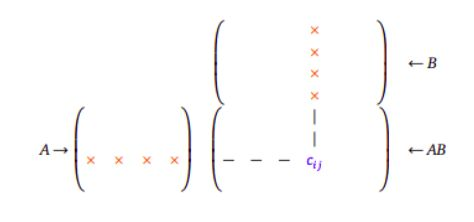

#### Exemple - Produit de deux matrices

\begin{align}
&A = \begin{pmatrix} 1 & 2 & 3 \\ 2 & 3 & 4 \end{pmatrix},
& B = \begin{pmatrix} 1 & 2 \\ -1 & 1 \\ 1 & 1 \end{pmatrix}.
\end{align}

On dispose d'abord le produit correctement (à gauche) : la matrice obtenue est de taille  $ 2\times 2 $ . Puis on calcule chacun des coefficients, en commençant par le premier coefficient  $ c_{11} = 1\times 1 + 2\times (-1) + 3\times 1 = 2 $  (au milieu), puis les autres (à droite).

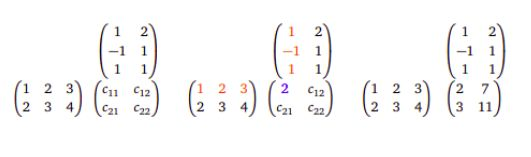

In [44]:
A1 = Matrix([[1,2,3], [2,3,4]])
B1 = Matrix([[1,2], [-1,1], [1,1]])
A1 * B1

Matrix([
[2,  7],
[3, 11]])

Un exemple intéressant est le produit d'un vecteur ligne  $ \langle u| $  par un vecteur colonne  $ |v\rangle $  :

 \begin{align}
 & \langle u| = \begin{pmatrix} a_1 & a_2 & \cdots & a_n \end{pmatrix},
 &|v\rangle = \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix}.
 \end{align}

Alors  $ u\times v $  est une matrice  $ 1\times 1 $  dont l'unique coefficient est  $ a_1b_1 + a_2b_2 + \cdots + a_nb_n. $  Ce nombre s'appelle le **produit scalaire des vecteurs**  $ \langle u| $  et  $| v \rangle$  et il est noté  $ \langle u|v\rangle $.

#### Remarques et propriétés des multiplications des matrices

* Le produit de deux matrices n'est pas commutatif  $ AB \ne BA $;

*  $ AB = 0 $  n'implique pas  $ A = 0 $  ou  $ B = 0 $;

*  $ AB = AC $  n'implique pas  $ B = C $ . On peut avoir  $ AB = AC $  et  $ B \ne C $;

*  $ A(BC) = (AB)C $  : associativité du produit;

*  $ A(B+C) = AB + AC $  et  $ (B + C)A = BA + CA $  : distributivité du produit par rapport à la somme;

*  $ A*0 = 0 $  et  $ 0*A = 0 $.

### Matrice identité

La matrice carrée suivante s'appelle la **matrice identité** :

 \begin{equation}
  \mathbb{I}_n = \begin{pmatrix} 1 & 0 & \cdots & 0 \\ 0 & 1 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & 1 
  \end{pmatrix} .
  \end{equation}

La matrice unité d'ordre p est telle que tous les éléments de la diagonale principale sont égaux à 1, les autres étant tous nuls.

\begin{equation}
a_{ij} = \delta_{ij}= \begin{cases} 0 & \text {si} & i\ne j, \\ 1 & \text {si} & i=j .\end{cases}
\end{equation}

### Puissance d'une matrice

 On peut multiplier une matrice carrée par elle-même : on note  $ A^2 = A\times A$ et $A^3 = A\times A\times A $ .

#### Exemple - Puissance d'une  $ A = \begin{pmatrix} 1 & 0 & 1 \\ 0 & -1 & 0 \\ 0 & 0 & 2 \end{pmatrix} $ . On calcule  $ A^2, A^3 $  et  $ A^4 $  et on obtient :

 $ A^2 = A\times A = \begin{pmatrix} 1 & 0 & 3 \\ 0 & 1 & 0 \\ 0 & 0 & 4 \end{pmatrix}, \ \ \ \ A^3 = A^2\times A = \begin{pmatrix} 1 & 0 & 7 \\ 0 & -1 & 0 \\ 0 & 0 & 8 \end{pmatrix}, \ \ \ \ A^4 = A^3\times A = \begin{pmatrix} 1 & 0 & 15 \\ 0 & 1 & 0 \\ 0 & 0 & 16 \end{pmatrix} $

In [45]:
#To declare a power, use a double asterisk '**'
A2 = Matrix([[1,0,1], [0,-1,0], [0,0,2]])
A2**2

Matrix([
[1, 0, 3],
[0, 1, 0],
[0, 0, 4]])

In [46]:
A2**3

Matrix([
[1,  0, 7],
[0, -1, 0],
[0,  0, 8]])

In [47]:
A2**4

Matrix([
[1, 0, 15],
[0, 1,  0],
[0, 0, 16]])

#### Exercice - Produit de deux matrices

Soient 
\begin{align}
 & A = \begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 1 & 2 \end{pmatrix},
 && B = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 2 \\ 1 & -1 & 0 \end{pmatrix},
 & C = \begin{pmatrix} -1 & 0 & 0 \\ 0 & 3 & 0 \\ 0 & 0 & 2 \end{pmatrix}.
\end{align}

Calculer  $ A^2, B^2, AB, BA, C^p, p \ge 2 $

In [48]:
A3 = Matrix([[0,0,1], [0,1,0], [1,1,2]])
B3 = Matrix([[1,0,0], [0,0,2], [1,-1,0]])
C3 = Matrix([[-1,0,0], [0,3,0], [0,0,2]])

   $ A^2 = A\times A = \begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 1 & 2 \end{pmatrix} \begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 1 & 2 \end{pmatrix} = \begin{pmatrix} 1 & 1 &2 \\ 0 & 1 & 0 \\ 2 & 3 & 5 \end{pmatrix} $

In [49]:
A3**2

Matrix([
[1, 1, 2],
[0, 1, 0],
[2, 3, 5]])

 $ B^2 = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 2 \\ 1 & -1 & 0 \end{pmatrix} \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 2 \\ 1 & -1 & 0 \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 \\ 2 & -2 & 0 \\ 1 & 0 & -2 \end{pmatrix} $

In [50]:
B3**2

Matrix([
[1,  0,  0],
[2, -2,  0],
[1,  0, -2]])

 $ AB = \begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 1 & 2 \end{pmatrix} \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 2 \\ 1 & -1 & 0 \end{pmatrix} = \begin{pmatrix} 1 & -1 & 0 \\ 0 & 0 & 2 \\ 3 & -2 & 2 \end{pmatrix} $

In [51]:
A3 * B3

Matrix([
[1, -1, 0],
[0,  0, 2],
[3, -2, 2]])

 $ BA = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 2 \\ 1 & -1 & 0 \end{pmatrix} \begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 1 & 2 \end{pmatrix} = \begin{pmatrix} 0 & 0 & 1 \\ 2 & 2 & 4 \\ 0 & -1 & 1 \end{pmatrix} $

In [52]:
B3 * A3

Matrix([
[0,  0, 1],
[2,  2, 4],
[0, -1, 1]])

 $ C^p, p \ge 2 $

In [53]:
C3**2

Matrix([
[1, 0, 0],
[0, 9, 0],
[0, 0, 4]])

In [54]:
C3**3

Matrix([
[-1,  0, 0],
[ 0, 27, 0],
[ 0,  0, 8]])

In [55]:
C3**4

Matrix([
[1,  0,  0],
[0, 81,  0],
[0,  0, 16]])

Par récurrence on obtient que  $ C^p = \begin{pmatrix}(-1)^p & 0 & 0 \\ 0 & 3^p & 0 \\ 0 & 0 & 2^p \end{pmatrix} $

### Matrices triangulaires - Matrices diagonales

Soit  $ A $  une matrice de taille  $ n\times p$.  

* On dit que  $ A $  est **triangulaire inférieure** si les elements au-dessus de la diagonale sont nuls :

\begin{equation}
A=\begin{pmatrix} a_{11}& 0 & \cdots & 0 & \cdots & 0 \\ a_{21}&a_{22}& \cdots & 0 &\cdots& 0 \\ a_{i1}&a_{i2}&\cdots&a_{ij}&\cdots& 0 \\ a_{n1}&a_{n2}&\cdots&a_{nj}&\cdots &a_{np}\end{pmatrix}.
\end{equation}

* On dit que  $ A $  est **triangulaire supérieure** si les elements en dessous de la diagonale sont nuls :

\begin{equation}
A=\begin{pmatrix} a_{11}&a_{12}&\cdots&a_{1j}&\cdots&a_{1p} \\ 0 &a_{22}&\cdots&a_{2j} &\cdots&a_{2p}\\ 0 & 0 &\cdots&a_{ij}&\cdots&a_{ip}\\ 0 & 0 &\cdots& 0 &\cdots&a_{np}\end{pmatrix}.
\end{equation}

* Une matrice qui est triangulaire superieure et triangulaire inferieure est dite **diagonale**:

\begin{equation}
A=\begin{pmatrix} a_{11}&0&\cdots& 0 &\cdots& 0  \\ 0 &a_{22}&\cdots& 0  &\cdots& 0 \\ 0 & 0 &\cdots&a_{ij}&\cdots& 0 \\ 0 & 0 &\cdots& 0 &\cdots&a_{np}\end{pmatrix}.
\end{equation}

#### Exemple - Matrices triangulaires - Matrices diagonales

 * Matrices triangualires inférieures

\begin{equation}
& A=\begin{pmatrix} -1 & 0 \\ 3 & 4 \end{pmatrix}
& C=\begin{pmatrix} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 1 & 0 & 3  \end{pmatrix}.
\end{equation}

* Matrices triangulaires supérieures

\begin{equation}
 &B=\begin{pmatrix} 2 & 1 \\ 0 & 3 \end{pmatrix}, 
 & D=\begin{pmatrix} -1 & -2 & 0 \\  2 & 3 & 0 \\ 0 & 0 & 1 \end{pmatrix}.
\end{equation}

* Matrice diagnale

\begin{equation}
E=\begin{pmatrix} -1 & 0 & 0 \\  0 & 3 & 0 \\ 0 & 0 & 1 \end{pmatrix}.
\end{equation}


In [56]:
#Declaration de la matrice A
A = Matrix([[-1,0],[3,4]])
A

Matrix([
[-1, 0],
[ 3, 4]])

In [57]:
#determination de la nature de la matrice A

#(triangulaire superieure,inferieure ou diagonale)
if A.is_upper:
    print("la matrice A est triangulaire superieure")
elif A.is_lower:
    print("la matrice A est triangulaire inferieure")
elif A.is_diagonal():
    print("La matrice A est diagonale")
else:
    print("la matrice A  n'est pas triangulaire")

la matrice A est triangulaire inferieure


###  Transposition


Soit  $ A $,  la matrice de taille  $ n\times p$

\begin{equation}
A=\begin{pmatrix} 
a_{11} & a_{12} &\cdots & a_{1i}& \cdots & a_{1p}\\ 
a_{21} & a_{22} &\cdots & a_{2i}& \cdots & a_{2p}\\
\vdots & \vdots & \cdots & \vdots & \cdots & \vdots\\
a_{i1} & a_{i2} &\cdots & a_{ii}& \cdots &a_{ip} \\
\vdots & \vdots & \cdots & \vdots & \cdots & \vdots \\
a_{n1} & a_{n2} &\cdots &\cdots &\cdots  & a_{np} 
\end{pmatrix} 
\end{equation}

On appelle **matrice transposée** de  $ A $  la matrice de taille  $ p\times n $  definie par :

\begin{equation}
A=\begin{pmatrix} 
a_{11} & a_{21} &\cdots & a_{i1}& \cdots & a_{p1}\\ 
a_{12} & a_{22} &\cdots & a_{i2}& \cdots & a_{p2}\\
\vdots & \vdots & \cdots & \vdots & \cdots & \vdots\\
a_{1i} & a_{2i} &\cdots & a_{ii}& \cdots &a_{pi} \\
\vdots & \vdots & \cdots & \vdots & \cdots & \vdots \\
a_{1n} & a_{2n} &\cdots &\cdots &\cdots  & a_{pn} 
\end{pmatrix} 
\end{equation}

Autrement, l'élément $a_{ij}$ a pour transposé l'élément $a_{ji}$.

#### Propriété des matrices transposées

Soient  $A$ et $B $  deux matrices de taille $n\times p$ et soit $ \alpha\$,  un scalaire.

*  $ (A + B)^T=A^T + B^T $;
*  $ (\alpha A)^T=\alpha A^T $;
*  $ (A^T)^T=A $;
*  $ (AB)^T=B^TA^T $.

#### Exemple - Matrice transposée

\begin{align}
& A=\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & -6 \\ -7 & 8 & -9  \end{pmatrix},
& A^T=\begin{pmatrix} 1 & 4 & -7 \\  2 & 5 & 8 \\ 3 & -6 & -9 \end{pmatrix}.
\end{align}

In [58]:
#Declaration de la matrice A
A = Matrix([[1,2,3],[4,5,-6],[-7,8,-9]])
A

Matrix([
[ 1, 2,  3],
[ 4, 5, -6],
[-7, 8, -9]])

In [59]:
#determination de la transposee
A.transpose()

Matrix([
[1,  4, -7],
[2,  5,  8],
[3, -6, -9]])

#### Exercice - Matrice transposée

Soient  $ A=\begin{pmatrix} -1 & 2 \\ 5 & 5 \end{pmatrix}$, $B=\begin{pmatrix} 7 & 1 \\ 5 & 7 \end{pmatrix}$, $C=\begin{pmatrix} 1 & 1 & 0 \\ -1 & 2 & 1 \\ 1 & 0 & 3  \end{pmatrix}$ et D=\begin{pmatrix} 1 & 2 & 2 \\  2 & 3 & 0 \\ 5 & 0 & -11 \end{pmatrix}$.

Calculer  $ A^T$, $B^T$, $(AB)^T$, $(BA)^T$, $C^T$, $D^T$. 

##### Solution

1. Transposees de  $ A $  et  $ B $

\begin{align}
& A^T=\begin{pmatrix} -1 & 5 \\ 2 & 5 \end{pmatrix},
&& B^T=\begin{pmatrix} 7 & 5 \\ 1 & 7 \end{pmatrix},
&& C^T=\begin{pmatrix} 1 & -1 & 1 \\ 1 & 2 & 0 \\ 0 & 1 & 3  \end{pmatrix}
& D^T=\begin{pmatrix} 1 & 2 & 5 \\  2 & 3 & 0 \\ 2 & 0 & -11 \end{pmatrix}
\end{align}

2. De ce qui précède, on a :

\begin{align}
& (AB)^T = B^TA^T = \begin{pmatrix} 7 & 5 \\ 1 & 7 \end{pmatrix}\begin{pmatrix} -1 & 5 \\ 2 & 5 \end{pmatrix} = \begin{pmatrix} 3 & 60 \\ 13 & 40 \end{pmatrix},
& (BA)^T &= A^TB^T = \begin{pmatrix} -1 & 5 \\ 2 & 5 \end{pmatrix}\begin{pmatrix} 7 & 5 \\ 1 & 7 \end{pmatrix} = \begin{pmatrix} -2 & 30 \\ 19 & 45 \end{pmatrix}
\end{align}


##### Sympy

In [60]:
#Declaration des matrices A , B ,C et D
A = Matrix([[-1,2],[5,5]])
B = Matrix([[7,1],[5,7]])
C = Matrix([[1,1,0],[-1,2,1],[1,0,3]])
D = Matrix([[1,2,2],[2,3,0],[5,0,-11]])

In [61]:
A

Matrix([
[-1, 2],
[ 5, 5]])

In [62]:
A.transpose()

Matrix([
[-1, 5],
[ 2, 5]])

In [63]:
B

Matrix([
[7, 1],
[5, 7]])

In [64]:
B. transpose()

Matrix([
[7, 5],
[1, 7]])

In [65]:
(A*B).transpose()

Matrix([
[ 3, 60],
[13, 40]])

In [66]:
(B*A).transpose()

Matrix([
[-2, 30],
[19, 45]])

In [67]:
C

Matrix([
[ 1, 1, 0],
[-1, 2, 1],
[ 1, 0, 3]])

In [68]:
C.transpose()

Matrix([
[1, -1, 1],
[1,  2, 0],
[0,  1, 3]])

In [69]:
D

Matrix([
[1, 2,   2],
[2, 3,   0],
[5, 0, -11]])

In [70]:
D.transpose()

Matrix([
[1, 2,   5],
[2, 3,   0],
[2, 0, -11]])

### Trace

La **trace** de la matrice  $ A $  est le nombre obtenu en additionnant les elements diagonaux de  $ A$.

\begin{equation}
\rm{Tr}(A)=a_{11} + a_{22} + \cdots + a_{nn}
\end{equation}

#### Proprietes des traces

Soient  $ A$ et $B $  deux matrices appartenant de taille $n\times p$ et soit $ \alpha$  un scalaire.

*  $ \rm{Tr}(A+B)=\rm{Tr}(A)+\rm{Tr}(B) $;
*  $ \rm{Tr}(\alpha A)=\alpha \rm{Tr}(A) $;
*  $ \rm{Tr}(A^T)=\rm{Tr}(A) $;
*  $ \rm{Tr}(AB)=\rm{Tr}(A)\rm{Tr}(B) $.
  
#### Exemple - Trace

\begin{align}
& A=\begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & -6 \\ -7 & 8 & -9  \end{pmatrix},
& \rm{Tr}(A)= 1 + 5 -9=-3 .
\end{align}

In [71]:
#Declaration de la matrice A
A = Matrix([[1,2,3],[4,5,-6],[-7,8,-9]])
A

Matrix([
[ 1, 2,  3],
[ 4, 5, -6],
[-7, 8, -9]])

In [72]:
#calcul de la trace de la matrice A
A.trace()

-3

### Matrices symetriques ou antisymétiques

* Une matrice  $ A $  de taille  $ n\times n $  est **symetrique** si elle est égale à sa transposée :

\begin{equation}
A^T = A.
\end{equation}

* Une matrice  $ A $  de taille  $ n\times n $  est **antisymetrique** si:
 \begin{equation}
A^T = - A.
\end{equation}

#### Exemple - Matrice symétrique

La matrice  $ A=\begin{pmatrix} 1 & -2 & -3 \\ -2 & 5 & 6 \\ -3 & 6 & -9  \end{pmatrix} $  est symétrique.

In [73]:
#Declaration de la matrice A
A = Matrix([[1,-2,-3],[-2,5,6],[-3,6,-9]])
A

Matrix([
[ 1, -2, -3],
[-2,  5,  6],
[-3,  6, -9]])

In [74]:
#Determination si la matrice est symétrique
A.is_symmetric()

True

#### Exemple - Matrice antisymétrique

La matrice  $ A=\begin{pmatrix} 0 & -3 & 4 \\ 3  & 0 & 2 \\ -4 & -2 & 0  \end{pmatrix} $  est antisymetrique. Remarquons que les éléments diagonaux d'une matrice antisymetrique sont toujours tous nuls.


In [75]:
#Declaration de la matrice A
A = Matrix([[0,-3,4],[3,0,2],[-4,-2,0]])
A

Matrix([
[ 0, -3, 4],
[ 3,  0, 2],
[-4, -2, 0]])

In [76]:
#Determination si la matrice est sym_ou_anti
A.is_anti_symmetric()

True

### Matrice Hermetienne

Une matrice **hermetienne ou auto-adjointe** est une matrice carrée avec des éléments complexes qui vérifie la propriété suivante:

* La matrice est égale à la matrice transposée conjugée  $ A=(A^T)^* $.

 Il est à noter que les éléments diagonaux d'une matrice hermetienne sont toujours tous réels. En particulier, une matrice à éléments réels est hermitienne si et seulement si elle est symétrique. Une matrice hermitienne est orthogonalement diagonalisable et toutes ses valeurs propres sont réelles ; ses sous-espaces propres sont 2 à 2 orthogonaux. En théorie quantique, on manipule des matrices hermitiennes.

#### Exemple - Matrice Hermetienne

La matrice  $ A=\begin{pmatrix} 3 & -i & 4i \\ i  & 0 & 5 \\ -4i & 5 & 10  \end{pmatrix} $  est hermetienne.


In [77]:
#Declaration de la matrice A
A = Matrix([[3,-1j,4j],[1j,0,5],[-4j,5,10]])
A

Matrix([
[     3, -1.0*I, 4.0*I],
[ 1.0*I,      0,     5],
[-4.0*I,      5,    10]])

In [78]:
#Determination de la matrice hermetienne conjuguee de la matrice A
A.H

Matrix([
[     3, -1.0*I, 4.0*I],
[ 1.0*I,      0,     5],
[-4.0*I,      5,    10]])

In [79]:
A.is_hermitian

True

### Inverse d'une matrice

#### Définition 

Soit  $ A $  une matrice carrée de taille  $ n\times n $ . S'il existe une matrice carrée  $ B $  de taille  $ n\times n $  telle que :    
\begin{align}
&AB = BA = \mathbb{I},
&\end{align}
on dit que  $ A $  est **inversible** et son inverse $ B = A^{-1} $ . Plus généralement, quand  $ A $  est inversible, pour tout  $ p\in \mathbb{N} $, on a :
\begin{equation}
A^{-p} = (A^{-1})^p = \underbrace{A^{-1}\times A^{-1}\times A^{-1}\times \cdots \times A^{-1}}_{p\ fois}
\end{equation}

#### Exemple Inverse d'une matrice

Soit  $ A = \begin{pmatrix} 1 & 2 \\ 0 & 3 \end{pmatrix} $. 

Etudier si  $ A $  est inversible, c'est étudier l'existence d'une matrice  $ B = \begin{pmatrix} a & b \\ c & d \end{pmatrix} $  à coefficients dans  $ \mathbb{K} $ , telle que  $ AB = BA = \mathbb{I} $.
\begin{equation}
AB = \mathbb{I} \Leftrightarrow \begin{pmatrix} 1 & 2 \\ 0 & 3 \end{pmatrix} \begin{pmatrix} a & b \\ c & d \end{pmatrix} =  \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \Leftrightarrow  \begin{pmatrix} a + 2c & b + 2d \\ 3c & 3d \end{pmatrix} =  \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}.
\end{equation}
Cette égalité équivaut au système : 
\begin{cases} a + 2c = 1 \\ a + 2d = 0 \\ 3c = 0 \\ 3d = 1 .
\end{cases}
Sa résolution est immédiate :  
\begin{align}
&a = 1, &&b = -\frac23, && c = 0, &d = \frac13 .
\end{align} 
Il n'y a donc qu'une seule matrice possible à savoir  
\begin{equation} 
B =  \begin{pmatrix} 1 & -\frac23 \\ 0 & \frac13 \end{pmatrix}.
\end{equation}
Pour prouver qu'elle convient, il faut aussi montrer l'égalité  $ BA =\mathbb{I} $. Cette vérification est laissée à la diligence du  lecteur. La matrice  $ A $  est donc inversible et  

\begin{equation}
 A^{-1} =  \begin{pmatrix} 1 & -\frac23 \\ 0 & \frac13 \end{pmatrix}.
 \end{equation} 

#### Propriétés matrices invertibles

Soient  $ A $ ,  $ B $  et  $ C $  trois matrices appartenant à  $ M_{n,p}(\mathbb{K}) $ . Soient  $ \alpha \in \mathbb{K} $  et  $ \beta \in \mathbb{K} $  deux scalaires

* Inverse de l'inverse  $ (A^{-1})^{-1} = A $ ,

* Inverse du produit  $ (AB)^{-1} = B^{-1}A^{-1} $ . Il faut bien faire attention à l'inversion de l'ordre.

#### Exercice - Matrices invertibles

Soient
\begin{align}
& A = \begin{pmatrix} -1 & -2 \\ 3 & 4 \end{pmatrix}, 
&&B = \begin{pmatrix} 2 & 1 \\ 5 & 3 \end{pmatrix}, 
&& C = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 1 & 0 & 3 \end{pmatrix}, 
& D = \begin{pmatrix} -1 & -2 & 0 \\ 2 & 3 & 0 \\ 0 & 0 & 1 \end{pmatrix}.
\end{align}

Calculer  $ A^{-1}$, $B^{-1}$, $(AB)^{-1}$, $(BA)^{-1}$, $A^{-2}$, $C^{-1} $, $ 2D - D^2 $. Sans calculs, en déduire  $ D^{-1} $.

##### Solutions
1.  $ AA^{-1} = I \Leftrightarrow \begin{pmatrix} -1 & -2 \\ 3 & 4 \end{pmatrix} \begin{pmatrix} a & b \\ c & d \end{pmatrix} =  \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \Leftrightarrow  \begin{pmatrix} -a - 2c & -b -2d \\ 3a + 4c & 3b + 4d \end{pmatrix} =  \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $

Cette égalité équivaut au système :

\begin{align}
&\begin{cases}
-a - 2c = 1 \\ -b - 2d \\ 3a + 4c \\ 3b + 4d = 1
\end{cases}
&&\Rightarrow 
&& a = 2, && b =1, &&c = -\frac32, &d = -\frac12.
\end{align}

Ainsi,
\begin{equation} 
A^{-1} = \begin{pmatrix} 2 & 1 \\ -\frac32 & -\frac12 \end{pmatrix}.
\end{equation}

On vérifie sans peine que,
\begin{equation}
 A^{-1}A = \begin{pmatrix} 2 & 1 \\ -\frac32 & -\frac12 \end{pmatrix} \begin{pmatrix} -1 & -2 \\ 3 & 4 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} =\mathbb{I}.
\end{equation}
La matrice est donc inversible et  $ A^{-1} = \begin{pmatrix} 2 & 1 \\ -\frac32 & -\frac12 \end{pmatrix}. $

2.  $ BB^{-1} = \mathbb{I} \Leftrightarrow \begin{pmatrix} 2 & 1 \\ 5 & 3 \end{pmatrix} \begin{pmatrix} a & b \\ c & d \end{pmatrix} =  \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \Leftrightarrow  \begin{pmatrix} 2a + c & 2b + d \\ 5a + 3c & 5b + 3d \end{pmatrix} =  \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $

Cette égalité équivaut au système :

\begin{align}
&\begin{cases}
2a + c = 1 \\ 2b + d = 0 \\ 5a + 3c = 0 \\ 5b + 3d = 1
\end{cases}
&&\Rightarrow 
&& a = 3, && b = -1, &&c = -5, &d = 2.
\end{align}

Ainsi  
\begin{equation}
B^{-1} = \begin{pmatrix} 3 & -1 \\ -5 & 2 \end{pmatrix} .
\end{equation}

On veŕifie que

\begin{equation}  
B^{-1}B = \begin{pmatrix} 3 & -1 \\ -5 & -3 \end{pmatrix} \begin{pmatrix} 2 & 1 \\ 5 & 3 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 
\end{pmatrix} .
\end{equation}

La matrice est donc inversible et  $ B^{-1} = \begin{pmatrix} 3 & -1 \\ -5 & 2 \end{pmatrix}. $ 

3. De ce qui précède, on a

 \begin{align}
&(AB)^{-1} = B^{-1}A^{-1} = \begin{pmatrix} 3 & -1 \\ -5 & 2 \end{pmatrix}\begin{pmatrix} 2 & 1 \\ -\frac32 & -\frac12 \end{pmatrix}
= \begin{pmatrix} \frac{15}{2} & \frac72 \\ -13 & -6 \end{pmatrix},\\
&(BA)^{-1} = A^{-1}B^{-1} 
= \begin{pmatrix} 2 & 1 \\ -\frac{3}{2} & -\frac{1}{2} \end{pmatrix} \begin{pmatrix} 3 & -1 \\ -5 & 2 \end{pmatrix}
= \begin{pmatrix} 1 & 0 \\ -2 & \frac{1}{2} \end{pmatrix}\\
& A^{-2} = (A^{-1})^2 = \begin{pmatrix} 2 & 1 \\ -\frac{3}{2} & -\frac{1}{2} \end{pmatrix}
\begin{pmatrix} 2 & 1 \\ -\frac32 & -\frac12 \end{pmatrix}= \begin{pmatrix} \frac52 & \frac32 \\ -\frac94 & -\frac54 \end{pmatrix},
\end{align}

4. $ CC^{-1} = \mathbb{I} \Leftrightarrow \begin{pmatrix} 1 & 0 & 0 \\ 0 & 2 & 0 \\ 1 & 0 & 3 \end{pmatrix} \begin{pmatrix} a & b & c \\ d & e & f \\ g & h & i \end{pmatrix} =  \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} $

Cette égalité équivaut au système :

\begin{align}
&\begin{cases}
a = 1 \\ b = 0 \\ c = 0 \\ 2d = 0 \\ 2e = 1 \\  2f = 0 \\ a + 3g = 0 \\ b + 3h = 0 \\ c + 3i = 1
\end{cases}
&&\Rightarrow 
& C^{-1} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & \frac12 & 0 \\ -\frac13 & 0 & \frac13 \end{pmatrix}.
\end{align}

On démontre avec aise que  $ C^{-1} C = \mathbb{I} $  et donc la matrice est inversible et sont inverse est 

\begin{equation}
C^{-1} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & \frac12 & 0 \\ -\frac13 & 0 & \frac13 \end{pmatrix}.
\end{equation}

5. Il est facile de montrer que  :

\begin{equation}
2D - D^2 = 2 \begin{pmatrix} -1 & -2 & 0 \\ 2 & 3 & 0 \\ 0 & 0 & 1 \end{pmatrix} - \begin{pmatrix} -1 & -1 & 0 \\ 2 & 3 & 0 \\ 0 & 0 & 1 \end{pmatrix}^2 = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}= \mathbb{I}.
\end{equation}

En multipliant les deux termes par $D^{-1}$ et en faisant l'hypothèse que $D^{-1} D=\mathbb{I}$, cad que $D$ est inversible, on a :

\begin{align}
& 2D - D ^2 = I \implies D^{-1} = 2 - D ,
& D^{-1} = \begin{pmatrix} 3 & -2 & 0 \\ -2 & -1 & 0 \\ 0 & 0 & 1 \end{pmatrix}.
\end{align}


#### Autre méthode de calcul

Une méthode efficace pour calculer l’inverse d’une matrice quelconque est une reformulation de la méthode du pivot de Gauss pour les systèmes
linéaires. Nous commençons par une formule directe dans le cas simple des matrices  $ 2\times 2$.

Considerons la matrice $A=\begin{pmatrix} a & b \\ c & d \end{pmatrix}$.  Si  $ \det(A)=ad-bc\ne 0 $  alors  $ A $  est inversible et 

\begin{equation} 
A^{-1}=\frac{1}{\det(A)}\begin{pmatrix} d & -b \\ -c & a \end{pmatrix} .
\end{equation}

Considérons par exemple, la matrice $ A=\begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} $. Comme $ \det(A)= 1\times 4 - 3\times 2=-2 \ne 0 $,  donc  $ A $  est inversible et  

\begin{equation}
 A^{-1} = -\frac12 \begin{pmatrix} 4 & -2 \\ -3 & 1 \end{pmatrix} .
 \end{equation}

In [80]:
#Declaration de la matrice A
A = Matrix([[1,2],[3,4]])
A

Matrix([
[1, 2],
[3, 4]])

In [81]:
#determination du determinant de la matrice A
det_A = A.det()
det_A

-2

In [82]:
#Verification de l'inversibilite de A
if det_A != 0: 
    print('A est inversible')
else: 
    print('A n\'est pas inversible')


A est inversible


Dans le cas d'une matrice A  $ 3\times 3 $, si  $ \det(A) \ne 0 $  alors  $ A $  est inversible et  
\begin{equation}
A^{-1} = \frac{1}{\det(A)}\times \rm{adj}(A), 
\end{equation}

où adj(A) est la matrice adjointe de  $ A $.

##### Exemple - Inverse d'un matrice 3x3

Déterminons l'inverse de la matrice  $ A = \begin{pmatrix} 1 & 2 & 3 \\ 0 & 1 & 4 \\ 5 & 6 & 0 \end{pmatrix}$.

* $ \det(A) = 1(0-24)-2(0-20)+3(0-5)=1 $ et $ A $  est inversible. 
* Ecrivons la matrice transposée de A
  \begin{equation}
  A^t =  \begin{pmatrix} 1 & 0 & 5 \\ 2 & 1 & 6 \\ 3 & 4 & 0 \end{pmatrix}.
  \end{equation}
* Calculons les cofacteurs des 9 élements de cette matrice.

\begin{equation}
\begin{aligned}
& \begin{vmatrix} 1 & 6 \\ 4 & 0 \end{vmatrix} = -24, && \begin{vmatrix} 2 & 6 \\ 3 & 0 \end{vmatrix} = -18, 
&& \begin{vmatrix} 2 & 1 \\ 3 & 4 \end{vmatrix} = 5, && \begin{vmatrix} 0 & 5 \\ 4 & 0 \end{vmatrix} = -20, 
&\begin{vmatrix} 1 & 5 \\ 3 & 0 \end{vmatrix} = -15, \\
&\begin{vmatrix} 1 & 0 \\ 3 & 4 \end{vmatrix} = 4,  && \begin{vmatrix} 0 & 5 \\ 1 & 6 \end{vmatrix} = -5, 
&& \begin{vmatrix} 1 & 5 \\ 2 & 6\end{vmatrix} = -4,  && \begin{vmatrix} 1 & 0 \\ 2 & 1 \end{vmatrix} = 1
& .
\end{aligned}
\end{equation}

* Ecrivons la matrice adjointe

\begin{equation}
 \rm{adj}(A) = \begin{pmatrix} -24 & -18 & 5 \\  -20 & -15 & 4 \\ -5 & 4 & 1 \end{pmatrix} \times \begin{pmatrix} + & - & + \\  - & + & - \\ + & - & + \end{pmatrix} = \begin{pmatrix} -24 & 18 & 5 \\  20 &-15 & -4 \\ -5 & 4 & 1 \end{pmatrix} .
\end{equation}

* La matrice inverse cherchée est
\begin{equation}
 A^{-1} = \frac{1}{\det(A)} \times\rm{adj}(A) = \begin{pmatrix} -24 & 18 & 5 \\  20 &-15 & -4 \\ -5 & 4 & 1 \end{pmatrix}.
\end{equation}


In [83]:
#Declaration de la matrice A
A = Matrix([[1,2,3],[0,1,4],[5,6,0]])

In [84]:
A

Matrix([
[1, 2, 3],
[0, 1, 4],
[5, 6, 0]])

In [85]:
#Determination de l'inverse
A.inv ()

Matrix([
[-24,  18,  5],
[ 20, -15, -4],
[ -5,   4,  1]])

#### Exercice - Inverse des matrices 

Soient  $ A=\begin{pmatrix} -1 & -2 \\ 3 & 4 \end{pmatrix}$, $B=\begin{pmatrix} 4 & 1 \\ 5 & 7 \end{pmatrix}$, $C=\begin{pmatrix} 1 & 1 & 0 \\ 0 & 2 & 0 \\ 1 & 0 & 3  \end{pmatrix}$, $D=\begin{pmatrix} 1 & 2 & 0 \\  2 & 3 & 0 \\ 0 & 0 & 1 \end{pmatrix}$.

Calculer  $ A^{-1}$, $B^{-1}$, $(AB)^{-1}$, $(BA)^{-1}$, $A^{-2}$, $ D^{-1}$.


##### Solution

1. $ A $ et $B$ étant des matrices $2\times 2$ avec $ \det(A)= -1\times 4 + 3\times 2=2 \ne 0 $ et $\det(B)= 4\times 7 - 5\times 1=23 \ne 0$ , on a

\begin{align}
& A^{-1}=\frac12\begin{pmatrix} 4 & -3 \\ 2 & -1 \end{pmatrix},
& B^{-1}=\frac{1}{23}\begin{pmatrix} 7 & -1 \\ -5 & 4 \end{pmatrix}.
\end{align}

2. De ce qui précède, on a:

\begin{align}
& (AB)^{-1} = B^{-1}A^{-1} =-\frac{1}{46}\begin{pmatrix} 7 & -1 \\ 5 & 4 \end{pmatrix}\begin{pmatrix} 4  & 2 \\ -3 & -1 \end{pmatrix}
= -\frac{1}{46}\begin{pmatrix} 31 & 15 \\ -32 & -14 \end{pmatrix},\\
& (BA)^{-1} = A^{-1}B^{-1} =-\frac{1}{46}\begin{pmatrix} 4  & 2 \\ -3 & -1 \end{pmatrix}\begin{pmatrix} 7 & -1 \\ 5 & 4 \end{pmatrix}
= -\frac{1}{46}\begin{pmatrix} 18 & 4 \\ -16 & -1 \end{pmatrix}\\
& A^{-2} = (A^{-1})^{2} = \frac{1}{4}\begin{pmatrix} 4  & 2 \\ -3 & -1 \end{pmatrix}\begin{pmatrix} 4  & 2 \\ -3 & -1 \end{pmatrix}\\
&= \frac{1}{4}\begin{pmatrix} 10 & 6 \\ -9 & 5 \end{pmatrix}
\end{align}

3. Comme $ \det(D) = 1(3-0)-2(2-0)+0(0-0)=-1 $, $D$ est inversible.

* En prenant la transposée de la matrice et en calculant ces cofacteurs, on trouve

\begin{equation}
\rm{adj}(D) = \begin{pmatrix} 3 & 2 & 0 \\  2 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \times \begin{pmatrix} + & - & + \\  - & + & - \\ + & - & + \end{pmatrix} = \begin{pmatrix}  3 & -2 & 0 \\  -2 & 1 & 0 \\ 0 & 0 & -1 \end{pmatrix}.
\end{equation}

* L'inverse recherchée est

\begin{equation}
 D^{-1} = \frac{1}{\det(D)} \times\rm{adj}(D) = \begin{pmatrix} -3 & 2 & 0 \\  2 & -1 & 0 \\ 0 & 0 & 1 \end{pmatrix}.
 \end{equation}

##### Sympy

In [86]:
#Declaration des matrices A , B ,C et D
A = Matrix([[-1,-2],[3,4]])
B = Matrix([[4,1],[5,7]])
C = Matrix([[1,1,0],[0,2,0],[1,0,3]])
D = Matrix([[1,2,0],[2,3,0],[0,0,1]])

In [87]:
A

Matrix([
[-1, -2],
[ 3,  4]])

In [88]:
A.inv()

Matrix([
[   2,    1],
[-3/2, -1/2]])

In [89]:
B

Matrix([
[4, 1],
[5, 7]])

In [90]:
B.inv()

Matrix([
[ 7/23, -1/23],
[-5/23,  4/23]])

In [91]:
(A*B).inv()

Matrix([
[ 31/46, 15/46],
[-16/23, -7/23]])

In [92]:
(B*A).inv()

Matrix([
[ 9/23,  2/23],
[-8/23, -1/46]])

In [93]:
A.inv()**2

Matrix([
[ 5/2,  3/2],
[-9/4, -5/4]])

In [94]:
C

Matrix([
[1, 1, 0],
[0, 2, 0],
[1, 0, 3]])

In [95]:
D

Matrix([
[1, 2, 0],
[2, 3, 0],
[0, 0, 1]])

In [96]:
D.inv()

Matrix([
[-3,  2, 0],
[ 2, -1, 0],
[ 0,  0, 1]])

## Notion de valeurs propres et de vecteurs propres

La connaissance des vecteurs et valeurs propres offre une information clé sur un système en physique quantique. Il existe de plus de nombreux cas où cette connaissance caractérise totalement le système.

### Definition

Soit  $ A\in M_n(\mathbb{K}) $.

*  $ \lambda $  est dite **valeur propre** de la matrice  $ A $  s'il existe un vecteur non nul  $ |\psi\rangle\in\mathbb{K}^n $  tel que:

\begin{equation}
A|psi\rangle=\lambda|psi\rangle.
\end{equation}

* Le vecteur  $ |psi\rangle $  est alors appelé **vecteur propre** de $A $  associé à la valeur propre  $\lambda$.

 ### Exemple - Valeurs et vecteurs propres

Soit la matrice $A=\begin{pmatrix} 1 & 3 & 3 \\ -2 & 11 & -2 \\ 8 & -7 & 6 \end{pmatrix}$.

* Verifier que $|\psi_1\rangle=\begin{pmatrix} -1 \\ 0 \\ 1\end{pmatrix}$ est vecteur propre de $A$.

En effet, 
\begin{equation}
 A|\psi_1\rangle=\begin{pmatrix}1 & 3 & 3 \\ -2 & 11 & -2 \\ 8 & -7 & 6 \end{pmatrix}\begin{pmatrix} -1 \\ 0 \\ 1 \end{pmatrix}=\begin{pmatrix} 2 \\ 0 \\ -2 \end{pmatrix}=-2|\psi\rangle.
\end{equation}

Donc $|\psi_1\rangle$ est vecteur propre de $A$ avec la valeur propre $\lambda_1=-2$.

* Verifier que $|\psi_2\rangle=\begin{pmatrix} 0 \\ 1 \\ -1\end{pmatrix}$ est vecteur propre de$A$.

En effet, 
\begin{equation}
 A|\psi_2\rangle=\begin{pmatrix}1 & 3 & 3 \\ -2 & 11 & -2 \\ 8 & -7 & 6 \end{pmatrix}\begin{pmatrix}0 \\ 1 \\ -1 \end{pmatrix}= 13\begin{pmatrix} 0 \\ 1 \\ -1 \end{pmatrix}=13|\psi_2\rangle.
\end{equation}

Donc $|\psi_2\rangle$ est un vecteur propre de $A$ associe à la valeur propre $\lambda_1=13$.

* Verifions que $\lambda_3=7$ est valeur propre de$A$.

Il s'agit donc de trouver un vecteur $|\psi_3\rangle=\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}$ tel que $A|\psi_3\rangle=7|\psi_3\rangle$.

En effet, 
\begin{equation}
\begin{split}
&A|\psi_3\rangle=7|\psi_3\rangle\Leftrightarrow\begin{pmatrix}1 & 3 & 3 \\ -2 & 11 & -2 \\ 8 & -7 & 6 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}=7\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}\\
&\begin{pmatrix}x_1 & 3x_2 & 3x_3 \\ -2x_1 & 11x_2 & -2x_3 \\ 8x_1 & -7x_2 & 6x_3 \end{pmatrix}=\begin{pmatrix} 7x_1 \\ 7x_2 \\ 7x_3 \end{pmatrix}\Leftrightarrow\begin{cases} -6x_1+3x_2+3x_3=0 \\ -2x_1+4x_2-2x_3=0 \\ 8x_1-7x_2-x_3=0 \end{cases}
\end{split}
\end{equation}
La résolution de ce systeme lineaire permet de trouver 
$|\psi_3\rangle=\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix}$

Autrement,  $|\psi_3\rangle$ est le vecteur propre de $A$ associé à la valeur propre $\lambda_3=7$.

#### Sympy

In [97]:
A = Matrix([[1,3,3],[-2,11,-2],[8,-7,6]])
A.eigenvals()

{13: 1, 7: 1, -2: 1}

Ce résultat indique, après les ":", la **multiplicité** de chaque valeur propre. Autrement, le nombre de vecteurs propres associés à cette valeur propre.

In [98]:
# Affichage des vecteurs propres
eigenvecs = A.eigenvects()
eigenvecs

[(-2,
  1,
  [Matrix([
   [-1],
   [ 0],
   [ 1]])]),
 (7,
  1,
  [Matrix([
   [1],
   [1],
   [1]])]),
 (13,
  1,
  [Matrix([
   [ 0],
   [-1],
   [ 1]])])]

Améliorons le lisibilité de ce résultat.

In [99]:
for eigenvec in eigenvecs :
    eigenval = eigenvec[0] # Valeurs propres
    multiplicity = eigenvec[1] # Multiplicité
    vectors = eigenvec[2] # Vecteurs propre
    
    print(f'La valeur propre {eigenval}, de multiplicité {multiplicity} a pour vecteur propre:')
    for vector in vectors :
        vector = vector/vector.norm() # Vecteur propre normalisé
        print(latex(vector)) #impression au format LaTeX    
    print()


La valeur propre -2, de multiplicité 1 a pour vecteur propre:


NameError: name 'latex' is not defined

#### Cas d'une matrice diagonale

 Le cas idéal est celui d’une matrice diagonale. En effet, dans ce cas, les vecteurs de base sont les vecteurs propres et les éléments de la diagonale sont les valeurs propres.

En d'autres termes, si 

\begin{equation}
A = \begin{pmatrix} \lambda_1 & 0 & \cdots & 0 & \cdots & 0 \\ \ 0 & \lambda_2 & \cdots & 0 & \cdots & \vdots \\ \vdots & \vdots & \cdots & \lambda_{n-1} & 0 & 0 \\ 0 & 0 & \cdots & 0 & 0 & \lambda_n \end{pmatrix},
\end{equation}

alors les scalaires $\lambda_{1,\cdots,n}$  sont des valeurs propres de $ A$, associés aux vecteurs de base $\{|u_1\rangle, |u_2\rangle, \cdots, |u_n\rangle\} dont la forme matricielle est :

\begin{align}
&|u_1\rangle=\begin{pmatrix} 1 \\ 0 \\ \vdots\\0\end{pmatrix},
&&|u_2\rangle=\begin{pmatrix} 0 \\ 1 \\ \vdots\\0\end{pmatrix}
&\cdots,|u_n\rangle=\begin{pmatrix} 0\\0\\\vdots\\1\end{pmatrix}.
\end{align}

La base engendrée par les $|u_i\rangle$ est appellée **base propre** de  $A$.

#### Exercice - Valeurs et vecteurs propres

Soient  
\begin{align}
& A=\begin{pmatrix} 2 & 5 \\ 3 & 4 \end{pmatrix},
&& B=\begin{pmatrix} 2 & -1 \\ -1 & 3 \end{pmatrix},
&&C=\begin{pmatrix} -1 & -1 & 0 \\ 0 & -2 & 0 \\ 11 & 0 & 0 \end{pmatrix},
& D=\begin{pmatrix} 5 & -7 & 7 \\  0 & 5 & 0 \\ 0 & 7 & -2 \end{pmatrix}.
\end{align}

* Montrer que $|u_1\rangle=\begin{pmatrix} 1 \\ 1 \end{pmatrix}$  et $|u_2\rangle=\begin{pmatrix} 5 \\ -3 \end{pmatrix}$  sont vecteurs propres de $ A$ Quelles sont les valeurs propres associees? Même question pour $B$  avec $|v_1\rangle=\begin{pmatrix} 2 \\ \sqrt{5}-1 \end{pmatrix}$  et $ |v_2\rangle=\begin{pmatrix} 2 \\ -\sqrt{5}-1 \end{pmatrix}$.
  
* Montrer que $ \lambda_1=-2,\lambda_2=-1,\lambda_3=0$  sont valeurs propres de $C$. Pour chaque valeur propre, trouver un vecteur propre associé.
* Montrer que les vecteurs $ |a\rangle=\begin{pmatrix} 3 \\ -1 \\ -1 \end{pmatrix},|b\rangle=\begin{pmatrix} 0 \\ 2 \\ 2 \end{pmatrix}$  et $ |c\rangle=\begin{pmatrix} 5 \\ 1 \\ 1 \end{pmatrix}$ sont vecteurs propres de $D$.

##### Solution

1. Montrons que  $ |u_1\rangle=\begin{pmatrix} 1 \\ 1 \end{pmatrix} $  et  $|u_2\rangle=\begin{pmatrix} 5 \\ -3 \end{pmatrix} $  sont vecteurs propres de $ A$.

En effet, on a :  
\begin{align}
&A|u_1\rangle=\begin{pmatrix}2 & 5 \\ 3 & 4 \end{pmatrix}\begin{pmatrix} 1 \\ 1 \end{pmatrix}=\begin{pmatrix} 7 \\ 7 \end{pmatrix}=7|u_1\rangle, \\
&A|u_2\rangle=\begin{pmatrix}2 & 5 \\ 3 & 4 \end{pmatrix}\begin{pmatrix} 5 \\ -3 \end{pmatrix}=\begin{pmatrix} -5 \\ 3\end{pmatrix}=-|u_2\rangle$.

Donc $|u_1\rangle$ et $|u_2\rangle$ sont vecteurs propres de $A$ avec respectivement pour valeurs propres $\lambda_1=7$ et $\lambda_2=-1$.

* On procedera de la meme facon avec la matrice  $B$.

2. Montrons que  $\lambda_1=-2,\lambda_2=-1,\lambda_3=0 $  sont valeurs propres de  $C$. Il s'agit de trouver les vecteurs propres $|X_i\rangle$ de composants $(x_1, x_2, x_3)$ tels que

\begin{equation}
C |X_i\rangle = \lambda_i|X_i\rangle,
\end{equation}
c-à-d

\begin{align}
&\begin{pmatrix} -1 & -1 & 0 \\ 0 & -2 & 0 \\ 11 & 0 & 0  \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}=\lambda_i\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}
& \Leftrightarrow\begin{pmatrix}-x_1 -x_2  \\ -2x_2\\ 11x_1 \end{pmatrix}=\begin{pmatrix} \lambda_i x_1 \\ \lambda_i x_2 \\ \lambda_i x_3 \end{pmatrix}\Leftrightarrow\begin{cases} -x_1(1+\lambda_i) -x_2=0 \\ -(2+\lambda_i)x_2=0\\ 11x_1 - \lambda_i x_3=0 \end{cases}
\end{align}

On trouve sans peine que,

* Pour $\lambda_1=-2 $, $(|X_1\rangle)^\dagger = \begin{pmatrix} 1 & 1 & -\frac{11}{2}\end{pmatrix}$;
* Pour $ \lambda_2=-1 $, $(|X_2\rangle)^\dagger = \begin{pmatrix} 1 & 0 & -11\end{pmatrix}$;
* Pour $\lambda_3=0$, $(|X_3\rangle)^\dagger = \begin{pmatrix} 0 & 0 & 1\end{pmatrix}$.

1. Montrons que les vecteurs  $ |a\rangle=\begin{pmatrix} 3 \\ -1 \\ -1 \end{pmatrix},\ |b\rangle=\begin{pmatrix} 0 \\ 2 \\ 2 \end{pmatrix}$  et  $ |c\rangle=\begin{pmatrix} 5 \\ 1 \\ 1 \end{pmatrix}$ sont vecteurs propres de $ D $.

\begin{align}
&D|a\rangle=\begin{pmatrix} 5 & -7 & 7 \\  0 & 5 & 0 \\ 0 & 7 & -2 \end{pmatrix}\begin{pmatrix} 3 \\ -1 \\ -1 \end{pmatrix}=\begin{pmatrix} 15 \\ -5 \\ -5 \end{pmatrix}=5|a\rangle ,\\
&& D|b\rangle=\begin{pmatrix} 5 & -7 & 7 \\  0 & 5 & 0 \\ 0 & 7 & -2 \end{pmatrix}\begin{pmatrix} 0 \\ 2 \\ 2 \end{pmatrix}=\begin{pmatrix} 0 \\ 10 \\ 10 \end{pmatrix}=5|b\rangle ,\\
& D|c\rangle = \begin{pmatrix} 5 & -7 & 7 \\  0 & 5 & 0 \\ 0 & 7 & -2 \end{pmatrix}\begin{pmatrix} 5 \\ 1 \\ 1 \end{pmatrix}
= 5|c\rangle .
\end{align}

Autrement, $|a\rangle$, $ |b\rangle$ et $|c\rangle$ sont vecteurs propres de $D$ avec la valeur propre  $5$ de multiplicité 3.

### Caracterisation des valeurs propres

 **Proposition** Soient  $ A\in M_n(\mathbb{K})$ et $\lambda\in\mathbb{K} $. Si $\lambda $ est une valeur propre de $ A$,
 \begin{equation}
  \det(A-\lambda \mathbb{I}_n)=0,
  \end{equation}
  
  $\mathbb{I}_n$ étant la matrice identité de taille  $ n\times n $.
 
 Il est à noter que quel que soit le vecteur $|\rangle\in\mathbb{K}$, 
 \begin{equation}
 \mathbb{I}_n|X\rangle=|X\rangle .
  \end{equation}


### Polynome carateristique

**Proposition** Soient  $A\in M_n(\mathbb{K})$ et $\lambda\in\mathbb{K} $. Le polynome caracteristique de  $ A $  est

\begin{equation}
P_A(\lambda)= \det(A-\lambda \mathbb{I}_n)=0,
\end{equation}

Si $\lambda$ est une valeur propre de $A$ alors $P(\lambda)=0$.

* La somme des valeurs propres vaut  $\rm{Tr}(A)$;
* Le produit des valeurs propres vaut  $\det(A)$.

### Methode pour diagonaliser une matrice

Pour diagonaliser la matrice $A$ :

1. On calcule d'abord son polynome caracteristique $P_A(\lambda) $;

2. On cherche les racines de $P_A(\lambda)$. Celles-ci sont les valeurs propres de  $A$;

3. Pour chaque valeur propre $\lambda_i$ de $A$, on cherche un vecteur propre  $ |u_i\rangle $.

 ### Exemple - Valeurs propres

 Pour $ A=\begin{pmatrix} 1 & 3 & 3 \\ -2 & 11 & -2 \\ 8 & -7 & 6 \end{pmatrix} $, on a

\begin{equation}
\begin{split}
P_A(\lambda) &= \det(A-\lambda \mathbb{I}_3) =\begin{vmatrix} 1-\lambda & 3 & 3 \\ -2 & 11-\lambda & -2 \\ 8 & -7 & 6-\lambda \end{vmatrix} \\
&= -\lambda^3 + 18 \lambda^2 -51\lambda - 182 =-(\lambda + 2)(\lambda - 7)(\lambda - 13).
\end{split}
\end{equation}

Donc les valeurs propres sont $-2$, $7$ et $13$.

On peut vérifier que 
* $ \det(A)=-2\times 7\times 13=-182 $  et 
* $\rm{Tr}(A)=-2+7+13=18 $

On peut écrire la matrice diagonale de  $ A $  comme suite :
\begin{equation} 
 A=\begin{pmatrix} -2 & 0 & 0 \\ 0 & 7 & 0 \\ 0 & 0 & 13 \end{pmatrix} .
 \end{equation}


 ### Sympy



In [ ]:
#Definition de la matrice A
A = Matrix([[1,3,3],[-2,11,-2],[8,-7,6]])
A

Matrix([
[ 1,  3,  3],
[-2, 11, -2],
[ 8, -7,  6]])

In [ ]:
#Determination du polynome caracteristique de A

# definition de la variable symbolique, x, du polynome caractéristique
#associé à la matrice A à l'aide de la fonction 'symbol'
x = Symbol('x')
P = A.charpoly(x)
#La fontion `charpoly` prend en parametre la variable symbolique, x, et retourne
#P, polynome caractéristique de A de parametre x
P

PurePoly(x**3 - 18*x**2 + 51*x + 182, x, domain='ZZ')

In [ ]:
#Calcul des valeurs propres de A
print(f"Les valeurs propres de {A} sont: {A.eigenvals()}")

Les valeurs propres de Matrix([[-1, -2], [3, 4]]) sont: {2: 1, 1: 1}


In [ ]:
#Determination de la matrice diagonale de la matrice A
A.diagonalize()

(Matrix([
 [-1, 1,  0],
 [ 0, 1, -1],
 [ 1, 1,  1]]),
 Matrix([
 [-2, 0,  0],
 [ 0, 7,  0],
 [ 0, 0, 13]]))

In [ ]:
#Declaration des matrices
A = Matrix([[-1,-2],[3,4]])
B = Matrix([[4,1],[5,7]])
C = Matrix([[1,1,0],[0,2,0],[1,0,3]])
D = Matrix([[1,2,0],[2,3,0],[0,0,1]])

In [ ]:
#Cacul des valeurs propres de A
print(f"Les valeurs propres de {A} sont {A.eigenvals()}" )

Les valeurs propres de Matrix([[-1, -2], [3, 4]]) sont {2: 1, 1: 1}


In [ ]:
#Cacul des valeurs propres de B
print(f"Les valeurs propres de {B} sont {B.eigenvals()}" )

Les valeurs propres de Matrix([[4, 1], [5, 7]]) sont {11/2 - sqrt(29)/2: 1, sqrt(29)/2 + 11/2: 1}


In [ ]:
#Cacul des valeurs propres de C
print(f"Les valeurs propres de {C} sont {C.eigenvals()}" )

Les valeurs propres de Matrix([[1, 1, 0], [0, 2, 0], [1, 0, 3]]) sont {2: 1, 1: 1, 3: 1}


In [ ]:
#Cacul des valeurs propres de D
print(f"Les valeurs propres de {D} sont {D.eigenvals()}" )

Les valeurs propres de Matrix([[1, 2, 0], [2, 3, 0], [0, 0, 1]]) sont {2 - sqrt(5): 1, 2 + sqrt(5): 1, 1: 1}


In [ ]:
#Calcul des vecteurs propres de A
for eigenvector in A.eigenvects():
    print("Le vecteur propre de A associe à la valeur propre",
          eigenvector[0],"est:", eigenvector[2][0])

Le vecteur propre de A associe a  la valeur propre 1 est: Matrix([[-1], [1]])
Le vecteur propre de A associe a  la valeur propre 2 est: Matrix([[-2/3], [1]])


In [ ]:
#Calcul des vecteurs propres de B
for eigenvector in B.eigenvects():
    print("Le vecteur propre de B associe à la valeur propre",
          eigenvector[0],"est:", eigenvector[2][0])

Le vecteur propre de B associe a  la valeur propre 11/2 - sqrt(29)/2 est: Matrix([[-sqrt(29)/10 - 3/10], [1]])
Le vecteur propre de B associe a  la valeur propre sqrt(29)/2 + 11/2 est: Matrix([[-3/10 + sqrt(29)/10], [1]])


In [ ]:
#Calcul des vecteurs propres de C
for eigenvector in C.eigenvects():
    print("Le vecteur propre de C associe à la valeur propre",
          eigenvector[0],"est:", eigenvector[2][0])

Le vecteur propre de C associe a  la valeur propre 1 est: Matrix([[-2], [0], [1]])
Le vecteur propre de C associe a  la valeur propre 2 est: Matrix([[-1], [-1], [1]])
Le vecteur propre de C associe a  la valeur propre 3 est: Matrix([[0], [0], [1]])


In [ ]:
#Calcul des vecteurs propres de D
for eigenvector in D.eigenvects():
    print("Le vecteur propre de D associe à la valeur propre",
          eigenvector[0],"est:", eigenvector[2][0])

Le vecteur propre de D associe a  la valeur propre 1 est: Matrix([[0], [0], [1]])
Le vecteur propre de D associe a  la valeur propre 2 - sqrt(5) est: Matrix([[-sqrt(5)/2 - 1/2], [1], [0]])
Le vecteur propre de D associe a  la valeur propre 2 + sqrt(5) est: Matrix([[-1/2 + sqrt(5)/2], [1], [0]])


## Exercices supplementaires

1. On donne donne les vecteurs  
\begin{align}
&|\psi\rangle=\frac{1}{\sqrt{3}}(|0\rangle + |1\rangle +i|2\rangle),  
& |\phi\rangle = \frac{1}{2}|0\rangle + \frac{i}{2}|1\rangle + \frac{1}{\sqrt{2}}|2\rangle
\end{align}
dans la base $\{|0\rangle,|1\rangle,|2\rangle\} $.

   1. Donner la forme matricielle de  $ |0\rangle,\ |1\rangle,\ |2\rangle $.
   2. Donner les formes matricielles de  $ |\psi\rangle$ et $|\phi\rangle $.
   3. Vérifier que $|0\rangle,\ |1\rangle, \|2\rangle$  sont normés.
   4. Déterminer le conjugué de  $ |\phi\rangle $.
   5. Calculer  $ \langle\phi|\psi\rangle $.
   6. Calculer  $ |\psi\rangle\langle\phi|$. La matrice obtenue est-elle hermetienne?


2. On donne dans la base  $ \{|0\rangle,|1\rangle\} $  les matrices suivantes :
\begin{align}
 &\mathtt{Y}=\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, 
 &&\mathtt{Z}=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}, 
 & A=2i|0\rangle\langle 0| + 3|0\rangle\langle 1|- 2|1\rangle\langle 0| + 4|1\rangle\langle 1|.
 \end{align}

   1. Verifier que  $ \mathtt{Y} $  et  $ \mathtt{Z} $  sont Hermetiens.
   2.  Calculer  $\rm{Tr}(Y)$  et  $\rm{Tr}(Z)$.
   3. Donner la trace et la forme matricielle de l'operateur $A$ Cet opérateur est-il Hermetien?
   4. Calculer  $\mathtt{Y}^2,\ \mathtt{Z}^2,\ \mathtt{YZ},\ \mathtt{ZY}$  et  $ \mathtt{YZ-ZY}$.
   5. Quelles sont les valeurs propres et les vecteurs propres de $\mathtt{Z}$?
   6. Déterminer les valeurs propres et les vecteurs propres de  $ \mathtt{Y} $
   7. Écrire la matrice de l'opérateur  $\mathtt{X}$ tel que $\mathtt{X}|0\rangle=|1\rangle,\ \mathtt{X}|1\rangle=|0\rangle$.  Si  $\mathtt{X}$  est une porte logique, quelle nom lui donnera-t-on ?
   8. Qu’est ce qu’une matrice Unitaire?
   9. Montrer que $\mathtt{Z}$ et $\mathtt{Y}$ sont des matrices unitaires.
   10. Donner les formes vectorielles de $\mathtt{Z}$ et $\mathtt{Y}$.

3. On donne dans la base $\{|0\rangle,|1\rangle,|2\rangle\}$, les matrices suivantes :

\begin{align}
& A=\begin{pmatrix} 1 & 0 & 0 \\ 5 & -4 & 0 \\ 6 & -6 & 0 \end{pmatrix},  
& B=\begin{pmatrix} -4 & 5 & 0 \\ 0 & 1 & 0 \\ -7 & 7 & 3 \end{pmatrix}.
\end{align}

   1. Calculer  $3A,\ -2B,\ A^2,\ [A,B]$.
   2. Déterminer les valeurs propres et les vecteurs propres de  $A$.
   3. Déterminer les valeurs propres et les vecteurs propres de  $B$.
   4. Quand dit-on que deux matrices $A$ et $B$ commutent?
   5. Donner une forme de la matrice de $E$ qui commute avec $A$.